# Toy example

## Problem Setup

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import scipy
import point_cloud_registration as pcr

In [3]:
# random points 
N, N1, N2 = 400, 276, 352

np.random.seed(0)
P = np.random.random((N, 3)) - 0.5
P1 = P[:N1].copy()
np.random.shuffle(P)
P2 = P[:N2].copy()

# jitter
P2 += np.random.randn(*P2.shape) * 0.002

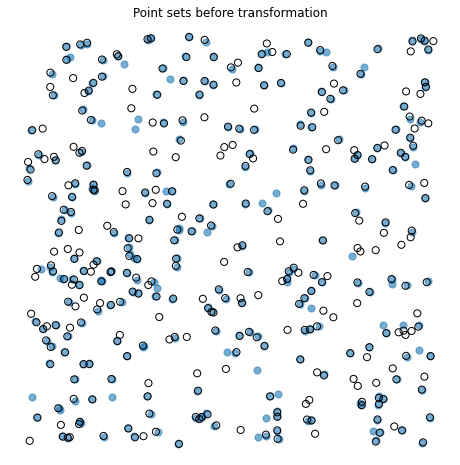

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(*P1.T[:2], s=50, alpha=0.6)
ax.scatter(*P2.T[:2], s=50, facecolor='none', color='k')
ax.axis(False)
ax.axis('equal');
ax.set_title('Point sets before transformation');

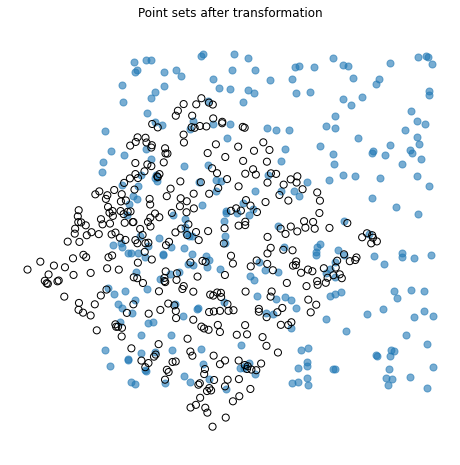

In [5]:
alpha = 0.7  # rotation angle (radians)
rotation = [
    [np.cos(alpha), -np.sin(alpha), 0],
    [np.sin(alpha), np.cos(alpha), 0],
    [0, 0, 1]]
scale = 0.75
P2 = scale * P2 @ rotation 
P1 += [0.2, 0.1, 0.1]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(*P1.T[:2], s=50, alpha=0.6)
ax.scatter(*P2.T[:2], s=50, facecolor='none', color='k')
ax.axis(False)
ax.axis('equal');
ax.set_title('Point sets after transformation');

## Complete solution

In [6]:
transform, offset, control_points = pcr.register(P2, P1, progress_bar=True)
    

computing tetra features: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8430/8430 [00:48<00:00, 174.59it/s]


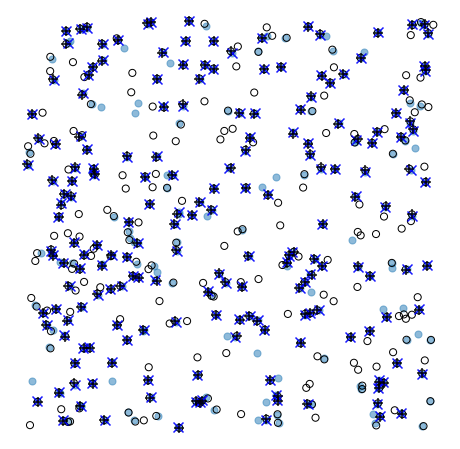

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

Q2 = P2 @ transform + offset
ax.scatter(*P1[:,:2].T, s=50, alpha=0.5)
ax.scatter(*Q2[:,:2].T, s=50, facecolor='none', color='k')
ax.axis(False)
ax.axis('equal')

# show control points
C1 = P1[control_points[:,1]]
C2 = Q2[control_points[:,0]]
ax.scatter(*C1[:,:2].T, s=100, marker='x', color='b', alpha=0.9)
ax.scatter(*C2[:,:2].T, s=100, marker='+', color='k', alpha=0.9);

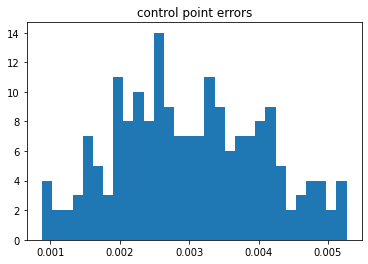

In [8]:
plt.hist(np.sqrt(np.sum(np.square(C1 - C2), axis=1)), 30)
plt.title('control point errors');